<a href="https://colab.research.google.com/github/robert-harr/Optics/blob/main/PrimaryRainbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainbow Model

Goal is to find where the reflected intensity peaks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Define functions used in the calculation. The rs and rp functions calculate the Fresnel reflection coefficients for s and p polarizations, respectively. The inputs are the incident angle  and the transmission angle , in radians.

In [ ]:
def Rs(a,b):
    return ( np.sin(b-a)/np.sin(b+a) )**2

def Rp(a,b):
    return ( np.tan(b-a)/np.tan(b+a) )**2

Define a function to calculate the displacement angle and intensities for a range of input angles.
This function will take the index of refraction, $n$, as an input.
The input angle is $\theta_i = \arcsin(h/R)$ where we use $R=1.0$ for convenience.
The angle of transmission is $\theta_t = \arcsin((\sin\theta_i)/n)$.
Inside the spherical water drop, all the interior angles are $\theta_t$ and all the external angles are $\theta_i$, simplifying the calculation of the total transmitted intensity
$$ \frac{I}{I_0} = T_{in} R T_{out} = (1-R)R(1-R) $$
where $R = r_s^2$ or $r_p^2$ and all the $s$ or $p$ Fresnel reflection coefficients are the same magnitude so that the squares are equal.

Look at $s$ and $p$-polarizations separately to see if the rainbow has net polarization.
Recall that the $r_s$ is smaller than $r_p$ over most of the angular range.

The displacement angle, $\theta_d$, is given by $\theta_d = 4\theta_t - 2\theta_i$.

In [ ]:
def Rainbow(n):
    h = np.linspace(0.001, 0.999, 998)
    thetai = np.arcsin(h)
    thideg = 180.*thetai/np.pi
    thetat = np.arcsin(h/n)
    thddeg = 180.*( 4*thetat - 2*thetai )/np.pi
    Is = np.cos(thetai) * Rs(thetai,thetat)*(1-Rs(thetai,thetat))**2
    Ip = np.cos(thetai) * Rp(thetai,thetat)*(1-Rp(thetai,thetat))**2
    return h, thetai, thideg, thddeg, Is, Ip

Look at a range of incoming angles, characterized by the impact parameter .

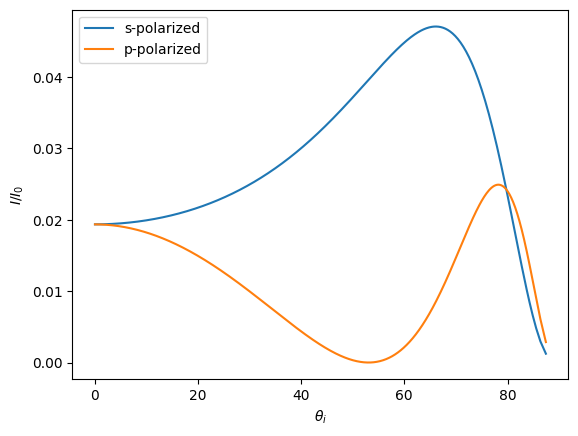

In [ ]:
n = 1.331
(h, thetai, thideg, thddeg, Is, Ip) = Rainbow(n)

plt.plot(thideg, Is, label='s-polarized')
plt.plot(thideg, Ip, label='p-polarized')
plt.xlabel('$\\theta_i$')
plt.ylabel('$I/I_0$')
plt.legend()
plt.show()

Look at the intensity versus incoming location of the ray $h$.
This is largely a sanity check to see that the code is working as expected.

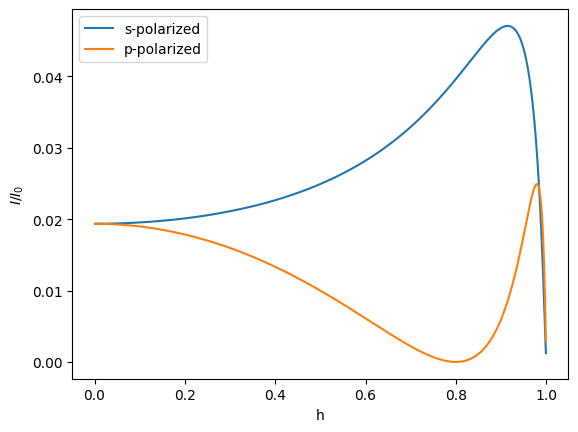

In [ ]:
plt.plot(h,Is, label='s-polarized')
plt.plot(h,Ip, label='p-polarized')
plt.xlabel('h')
plt.ylabel('$I/I_0$')
plt.legend()
plt.show()

Now look at the intensity versus angle of deviation of the light.
Recall that the angle of deviation $\theta_d$ is the angle between the incoming and exiting ray.

Here we see both the extremum of the displacement angle near $42^{\circ}$ and the peak in intensity closer to $40^{\circ}$.

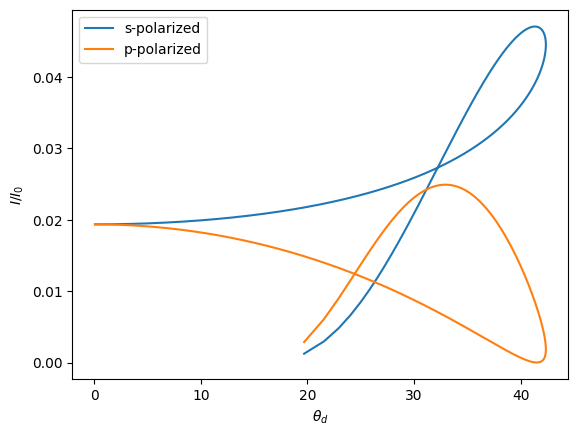

In [ ]:
plt.plot(thddeg, Is, label='s-polarized')
plt.plot(thddeg, Ip, label='p-polarized')
plt.xlabel('$\\theta_d$')
plt.ylabel('$I/I_0$')
plt.legend()
plt.show()

Plot the reflected $s$ and $p$ intensities versus the displacement angle $\theta_d$ for a range of indices of refraction corresponding to colors in water.
This shows both the extremum in $\theta_d$, the points furthest to the right for each color, and the maximum in intensity, the points closest to the top of the plot.
The extrema and the maximum intensities differ by a couple of degrees in $\theta_d$.

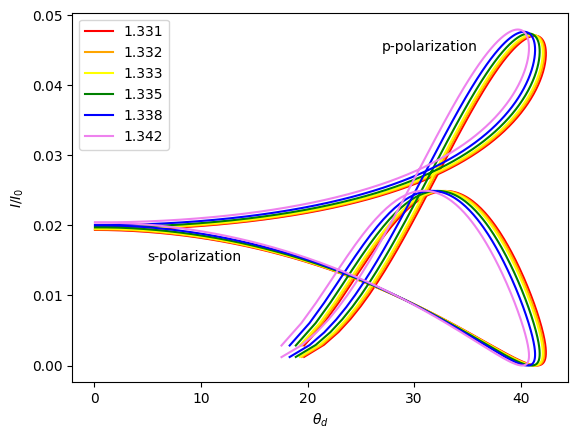

In [ ]:
indices=((1.331,'red'), (1.332,'orange'), (1.333,'yellow'), (1.335,'green'), (1.338,'blue'), (1.342,'violet'))
for (index, color) in (indices):
    (h, thetai, thideg, thddeg, Is, Ip) = Rainbow(index)
    plt.plot(thddeg, Is, color=color, label=index)
    plt.plot(thddeg, Ip, color=color)
plt.xlabel('$\\theta_d$')
plt.ylabel('$I/I_0$')
plt.legend()
plt.text(27, 0.045,'p-polarization')
plt.text(5,0.015,'s-polarization')
plt.show()